In [1]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("D:\Thesis\BIG DATA\Database Churn\joy work\Telecom_customer churn (100000).csv")

In [3]:
num_df = df.select_dtypes(include=['float64', 'int64']).copy()
cat_df = df.select_dtypes(include=['object']).copy()

# Categorical boolean mask
categorical_feature_mask = cat_df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = cat_df.columns[categorical_feature_mask].tolist()

import numpy as np
#conData=np.log(0.00001 + 1)
conData=0
cat_df=cat_df.fillna(conData)
num_df=num_df.fillna(conData)
cat_df=cat_df.astype(str)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_df[categorical_cols] = cat_df[categorical_cols].apply(lambda col: le.fit_transform(col))

#cat_df[categorical_cols].head(10)

change_mou=num_df['change_mou']
change_rev=num_df['change_rev']
num_df=num_df.drop(['change_mou'], axis=1)
num_df=num_df.drop(['change_rev'], axis=1)

num_df=num_df.drop(['Customer_ID'], axis=1)

churn=num_df['churn']
num_df=num_df.drop(['churn'], axis=1)


num_df=num_df.fillna(conData)

result_df = pd.concat([num_df, cat_df], axis=1)
np.nan_to_num(result_df)

result_df_op=result_df

X=result_df_op
y=churn


In [4]:
from mlencoders.weight_of_evidence_encoder import WeightOfEvidenceEncoder

enc = WeightOfEvidenceEncoder(cols=X.columns)
X_encoded = enc.fit_transform(X, y)
X_encoded.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,drop_vce_Mean,...,infobase,HHstatin,dwllsize,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd
0,0.000000,0.556517,0.017520,-0.022460,-0.015257,-0.014783,-0.033784,0.018887,0.014593,-0.011647,...,-0.025602,-0.036986,-0.045587,-0.028551,-0.002808,-0.000904,0.002464,0.00339,-0.001641,-0.021631
1,0.017520,-0.164801,0.000000,-0.022460,0.045300,-0.107643,-0.112533,0.018887,0.014593,-0.060797,...,-0.025602,-0.036986,-0.045587,-0.400201,-0.002808,-0.000904,0.002464,0.00339,-0.001641,-0.021631
2,-0.015816,0.751490,0.094113,0.047296,-0.015257,-0.014783,-0.033784,0.018887,0.014593,-0.028216,...,-0.025602,-0.036986,-0.045587,-0.028551,-0.002808,0.043076,0.002464,0.00339,-0.001641,-0.021631
3,-1.081092,0.199842,0.017520,0.047296,-0.015257,-0.014783,-0.033784,0.018887,0.014593,0.175511,...,-0.025602,-0.036986,0.052330,0.018434,0.095326,-0.000904,0.002464,0.00339,-0.001641,-0.021631
4,-0.270162,-0.339154,-0.136630,0.047296,-0.015257,-0.014783,-0.033784,0.018887,0.014593,0.063701,...,-0.025602,-0.036986,-0.037101,0.066336,-0.002808,-0.000904,0.002464,0.00339,-0.001641,-0.021631


In [5]:
X_encoded[X_encoded < 0]=0
X_encoded.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,drop_vce_Mean,...,infobase,HHstatin,dwllsize,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd
0,0.00000,0.556517,0.017520,0.000000,0.0000,0.0,0.0,0.018887,0.014593,0.000000,...,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.002464,0.00339,0.0,0.0
1,0.01752,0.000000,0.000000,0.000000,0.0453,0.0,0.0,0.018887,0.014593,0.000000,...,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.002464,0.00339,0.0,0.0
2,0.00000,0.751490,0.094113,0.047296,0.0000,0.0,0.0,0.018887,0.014593,0.000000,...,0.0,0.0,0.00000,0.000000,0.000000,0.043076,0.002464,0.00339,0.0,0.0
3,0.00000,0.199842,0.017520,0.047296,0.0000,0.0,0.0,0.018887,0.014593,0.175511,...,0.0,0.0,0.05233,0.018434,0.095326,0.000000,0.002464,0.00339,0.0,0.0
4,0.00000,0.000000,0.000000,0.047296,0.0000,0.0,0.0,0.018887,0.014593,0.063701,...,0.0,0.0,0.00000,0.066336,0.000000,0.000000,0.002464,0.00339,0.0,0.0


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.0, random_state=42)

In [11]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
classifier = GaussianNB()

classifier.fit(X_train,y_train)

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

from sklearn.model_selection import cross_val_score
roc_auc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10,  scoring='roc_auc')
print('roc_auc: ',roc_auc.mean())

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
auc = auc(fpr, tpr)
print('auc: ',auc)

35559 4858 18834 20749
pod:  0.5241896773867569
pof:  0.1201969468293045
AUC:  0.7019963652787262
roc_auc:  0.8132135095420031
auc:  0.7019963652787262


In [6]:
# KNN
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train) 

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)


#from sklearn.model_selection import cross_val_score
#roc_auc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10,  scoring='roc_auc')
#print('roc_auc: ',roc_auc.mean())

#from sklearn.metrics import roc_curve, auc
#fpr, tpr, thresholds = roc_curve(y_train, y_pred)
#auc = auc(fpr, tpr)
#print('auc: ',auc)

32906 7511 8300 31283
pod:  0.7903140236970416
pof:  0.1858376425761437
AUC:  0.802238190560449


In [7]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier =RandomForestClassifier(n_estimators=100,max_depth=2,random_state=0)
classifier.fit(X_train, y_train) 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

#from sklearn.model_selection import cross_val_score
#roc_auc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10,  scoring='roc_auc')
#print('roc_auc: ',roc_auc.mean())

#from sklearn.metrics import roc_curve, auc
#fpr, tpr, thresholds = roc_curve(y_train, y_pred)
#auc = auc(fpr, tpr)
#print('auc: ',auc)

39425 11013 15148 34414
pod:  0.6943626165207215
pof:  0.21834727784606844
AUC:  0.7380076693373265


auc:  0.7380076693373265


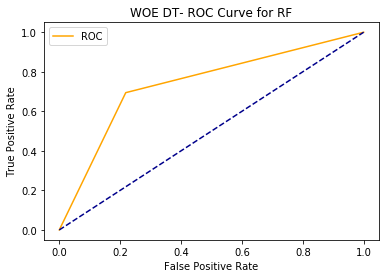

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
auc = auc(fpr, tpr)
print('auc: ',auc)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('WOE DT- ROC Curve for RF')
plt.legend()
plt.show()

In [14]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
classifier = LogisticRegression()
classifier.fit(X_train, y_train) 

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

#from sklearn.model_selection import cross_val_score
#roc_auc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10,  scoring='roc_auc')
#print('roc_auc: ',roc_auc.mean())

#from sklearn.metrics import roc_curve, auc
#fpr, tpr, thresholds = roc_curve(y_train, y_pred)
#auc = auc(fpr, tpr)
#print('auc: ',auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

33325 7092 8895 30688
pod:  0.7752823181668899
pof:  0.17547071776727616
AUC:  0.799905800199807


In [6]:
#FNN
def get_FNN_Predict(X2_train, X2_test, y2_train, y2_test):
    from keras.models import Sequential
    from keras.layers import Dense
    #create model
    model = Sequential()
    #get number of columns in training data
    n_cols = X2_train.shape[1]
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(250, activation='relu'))
    model.add(Dense(250, activation='relu'))
    model.add(Dense(250, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #compile model using mse as a measure of model performance
    #model.compile(optimizer='adam', loss='mean_squared_error')
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    #model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  
    from keras.callbacks import EarlyStopping
    #set early stopping monitor so the model stops training when it won't improve anymore
    early_stopping_monitor = EarlyStopping(patience=3)
    #train model
    model.fit(X2_train, y2_train, validation_split=0.2, epochs=30, callbacks=[early_stopping_monitor])
    y2_pred = model.predict(X2_test)
    print('y2_pred: ',y2_pred)
    y22_pred=y2_pred.round()
    print('y22_pred: ',y22_pred)
    return y22_pred

pod_list = []
pof_list = []
auc_val_list = []
tn_list= []
fp_list= []
fn_list= []
tp_list= []
    
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10)
for train_index, test_index in folds.split(X_train,y_train):
    X2_train, X2_test, y2_train, y2_test=X_train.iloc[train_index], X_train.iloc[test_index],y_train.iloc[train_index], y_train.iloc[test_index]
    y_pred = get_FNN_Predict(X2_train, X2_test, y2_train, y2_test)
    tn, fp, fn, tp  = confusion_matrix(y2_test, y_pred).ravel()
    tn_list.append(tn)
    fp_list.append(fp)
    fn_list.append(fn)
    tp_list.append(tp)
    pod=tp/(tp+fn)
    print('pod 1st: ',pod)
    pof=fp/(fp+tn)
    auc_val=(1+pod-pof)/2
    #break
    pod_list.append(pod)
    pof_list.append(pof)
    auc_val_list.append(auc_val)

print('pod: ',pod_list)
print ('pof: ',pof_list)
print ('auc: ',auc_val_list)

print ('tn mean: ',sum(tn_list) / len(tn_list))
print ('fp mean: ',sum(fp_list) / len(fp_list))
print ('fn mean: ',sum(fn_list) / len(fn_list))
print ('tp mean: ',sum(tp_list) / len(tp_list))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 71999 samples, validate on 18000 samples
Epoch 1/30
71999/71999 [==============================] - 4s 58us/step - loss: 0.4464 - acc: 0.7896 - val_loss: 0.4299 - val_acc: 0.8036
Epoch 2/30
71999/71999 [==============================] - 4s 54us/step - loss: 0.4244 - acc: 0.8041 - val_loss: 0.4196 - val_acc: 0.8062
Epoch 3/30
71999/71999 [==============================] - 4s 53us/step - loss: 0.4186 - acc: 0.8065 - val_loss: 0.4232 - val_acc: 0.8008
Epoch 4/30
71999/71999 [==============================] - 4s 50us/step - loss: 0.4166 - acc: 0.8084 - val_loss: 0.4157 - val_acc: 0.8097
Epoch 5/30
71999/71999 [==============================] - 4s 50us/step - loss: 0.4141 - acc: 0.8096 - val_loss: 0.4162 - val_acc: 0.8076
Epoch 6/30
71999/71999 [==============================] - 4s 49us/step - loss: 0.4128 - acc: 0.8105 - val_loss: 0.4186 - val_acc: 0.8066
Epoch 7/

In [7]:
#RNN
def get_RNN_Predict(X2_train, X2_test, y2_train, y2_test):
    import pandas as pd
    from keras.models import Sequential
    from keras.layers import Dense,Dropout, LSTM, GRU
    from keras.layers import Embedding
    max_features = 10000 # number of words to consider as features
    import numpy as np
    #create model 
    model = Sequential()
    model.add(Embedding(max_features, 32))
    model.add(LSTM(32))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(X2_train, y2_train, epochs=5, batch_size=128, validation_split=0.2)
    y2_pred = model.predict(X2_test)
    y22_pred=y2_pred.round()
    print('y22_pred: ',y22_pred)
    return y22_pred

pod_list = []
pof_list = []
auc_val_list = []
tn_list= []
fp_list= []
fn_list= []
tp_list= []
    
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10)
for train_index, test_index in folds.split(X_train,y_train):
    X2_train, X2_test, y2_train, y2_test=X_train.iloc[train_index], X_train.iloc[test_index],y_train.iloc[train_index], y_train.iloc[test_index]
    y_pred = get_RNN_Predict(X2_train, X2_test, y2_train, y2_test)
    tn, fp, fn, tp  = confusion_matrix(y2_test, y_pred).ravel()
    tn_list.append(tn)
    fp_list.append(fp)
    fn_list.append(fn)
    tp_list.append(tp)
    
    pod=tp/(tp+fn)
    print('pod 1st: ',pod)
    pof=fp/(fp+tn)
    auc_val=(1+pod-pof)/2
    #break
    pod_list.append(pod)
    pof_list.append(pof)
    auc_val_list.append(auc_val)

print('pod: ',pod_list)
print ('pof: ',pof_list)
print ('auc: ',auc_val_list)

print ('tn mean: ',sum(tn_list) / len(tn_list))
print ('fp mean: ',sum(fp_list) / len(fp_list))
print ('fn mean: ',sum(fn_list) / len(fn_list))
print ('tp mean: ',sum(tp_list) / len(tp_list))

Train on 71999 samples, validate on 18000 samples
Epoch 1/5
71999/71999 [==============================] - 27s 369us/step - loss: 0.6319 - acc: 0.6325 - val_loss: 0.5781 - val_acc: 0.7105
Epoch 2/5
71999/71999 [==============================] - 25s 345us/step - loss: 0.5808 - acc: 0.7120 - val_loss: 0.5840 - val_acc: 0.7123
Epoch 3/5
71999/71999 [==============================] - 25s 349us/step - loss: 0.5829 - acc: 0.7122 - val_loss: 0.5992 - val_acc: 0.7123
Epoch 4/5
71999/71999 [==============================] - 24s 338us/step - loss: 0.5839 - acc: 0.7156 - val_loss: 0.5839 - val_acc: 0.7123
Epoch 5/5
71999/71999 [==============================] - 25s 342us/step - loss: 0.5842 - acc: 0.7152 - val_loss: 0.5851 - val_acc: 0.7123
y22_pred:  [[1.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [0.]]
pod 1st:  0.7212023401250757
Train on 71999 samples, validate on 18000 samples
Epoch 1/5
71999/71999 [==============================] - 26s 357us/step - loss: 0.6232 - acc: 0.6474 - val_loss: 0.5802 - val_ac

In [8]:
#CNN - 1D CNN
def get_CNN_Predict(X2_train, X2_test, y2_train, y2_test):
    from keras.models import Sequential
    from keras import layers
    from keras.optimizers import RMSprop
    max_features = 10000 # number of words to consider as features
    
    model = Sequential()
    model.add(layers.Embedding(max_features, 128, input_length=96))
    model.add(layers.Conv1D(32, 7, activation='relu'))
    model.add(layers.MaxPooling1D(5))
    model.add(layers.Conv1D(32, 7, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(1))
    model.summary()
    model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(X2_train, y2_train, epochs=5, batch_size=128, validation_split=0.2)
    y2_pred = model.predict(X2_test)
    y22_pred=y2_pred.round()
    y22_pred[y22_pred ==2.0]=1
   # y22_pred=y22_pred[y22_pred > 1.0]=1
    print('y22_pred: ',y22_pred)
    return y22_pred

pod_list = []
pof_list = []
auc_val_list = []
tn_list= []
fp_list= []
fn_list= []
tp_list= []
    
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10)
for train_index, test_index in folds.split(X_train,y_train):
    X2_train, X2_test, y2_train, y2_test=X_train.iloc[train_index], X_train.iloc[test_index],y_train.iloc[train_index], y_train.iloc[test_index]
    y_pred = get_CNN_Predict(X2_train, X2_test, y2_train, y2_test)
    tn, fp, fn, tp  = confusion_matrix(y2_test, y_pred).ravel()
    tn_list.append(tn)
    fp_list.append(fp)
    fn_list.append(fn)
    tp_list.append(tp)
    pod=tp/(tp+fn)
    print('pod 1st: ',pod)
    pof=fp/(fp+tn)
    auc_val=(1+pod-pof)/2
    #break
    pod_list.append(pod)
    pof_list.append(pof)
    auc_val_list.append(auc_val)

print('pod: ',pod_list)
print ('pof: ',pof_list)
print ('auc: ',auc_val_list)

print ('tn mean: ',sum(tn_list) / len(tn_list))
print ('fp mean: ',sum(fp_list) / len(fp_list))
print ('fn mean: ',sum(fn_list) / len(fn_list))
print ('tp mean: ',sum(tp_list) / len(tp_list))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 96, 128)           1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 90, 32)            28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 18, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 12, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
_________________________________________________________________


Train on 72000 samples, validate on 18000 samples
Epoch 1/5
72000/72000 [==============================] - 47s 648us/step - loss: 0.6343 - acc: 0.6816 - val_loss: 0.5875 - val_acc: 0.7043
Epoch 2/5
72000/72000 [==============================] - 44s 615us/step - loss: 0.5850 - acc: 0.7086 - val_loss: 0.5832 - val_acc: 0.7051
Epoch 3/5
72000/72000 [==============================] - 42s 586us/step - loss: 0.5807 - acc: 0.7139 - val_loss: 0.5815 - val_acc: 0.7123
Epoch 4/5
72000/72000 [==============================] - 42s 588us/step - loss: 0.5823 - acc: 0.7161 - val_loss: 0.5840 - val_acc: 0.7122
Epoch 5/5
72000/72000 [==============================] - 42s 585us/step - loss: 0.5838 - acc: 0.7168 - val_loss: 0.5893 - val_acc: 0.7120
y22_pred:  [[1.]
 [1.]
 [1.]
 ...
 [0.]
 [1.]
 [0.]]
pod 1st:  0.7177158999192897
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 96, 128)  

In [116]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)



from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

42015 8423 11212 38350
pod:  0.7737782978895121
pof:  0.16699710535707205
AUC:  0.8033905962662201


In [48]:
 tn, fp, fn  = confusion_matrix(y2_test, y_pred).ravel()

ValueError: too many values to unpack (expected 3)

In [102]:
returned =  confusion_matrix(y2_test, y_pred).ravel()
returned

array([3573, 1469,    2, 1382, 3567,    8,    0,    0,    0], dtype=int64)

In [94]:
len(returned)

9

In [114]:
y_pred[y_pred ==2.0]=1
y22=y_pred[y_pred ==2.0]
y22

array([], dtype=float32)

In [59]:
import numpy as np
0

array([2., 2., 2., 2.], dtype=float32)

In [88]:
import numpy as np
y22_pred[y22_pred > 1.0]=1

TypeError: 'numpy.int64' object does not support item assignment